<a href="https://www.kaggle.com/code/areejrohyiem/cars-are?scriptVersionId=168481632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.shape

(4340, 8)

In [7]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [8]:
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [9]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [10]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [11]:
df['transmission'][df['selling_price']==df['selling_price'].max()]

3872    Automatic
Name: transmission, dtype: object

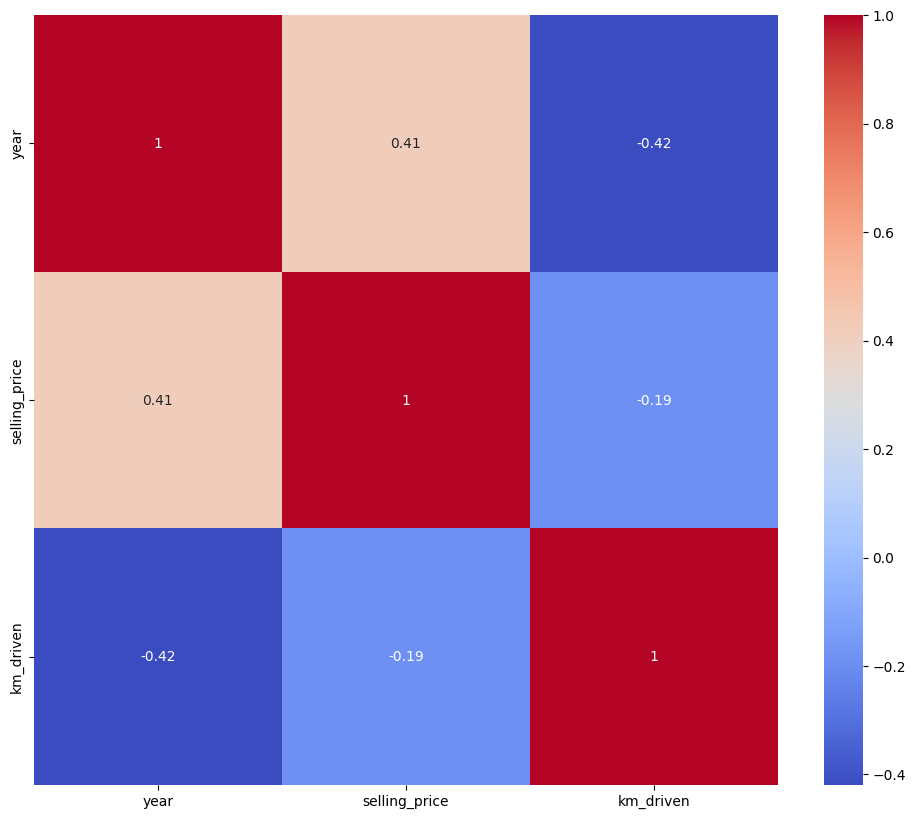

In [12]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(12, 10)) # size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='selling_price', ylabel='transmission'>

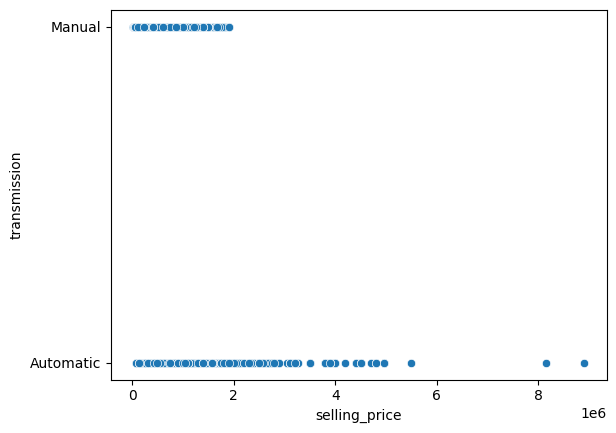

In [13]:
sns.scatterplot(x='selling_price', y='transmission', data=df)

In [14]:
df['fuel'][df['selling_price']==df['selling_price'].max()]

3872    Petrol
Name: fuel, dtype: object

<Axes: xlabel='selling_price', ylabel='fuel'>

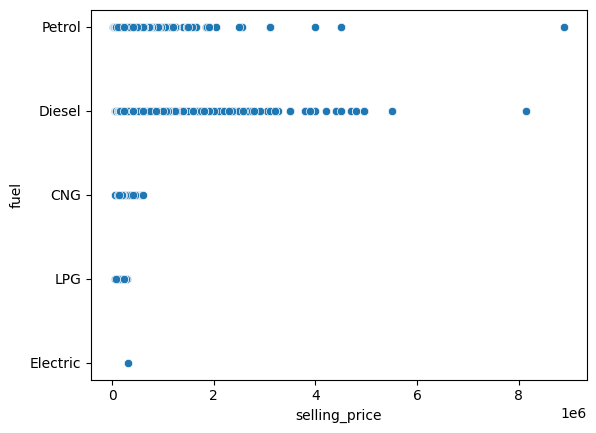

In [15]:
sns.scatterplot(x='selling_price', y='fuel', data=df)

In [16]:
df['km_driven'][df['selling_price']==df['selling_price'].max()]

3872    13000
Name: km_driven, dtype: int64

<Axes: xlabel='selling_price', ylabel='km_driven'>

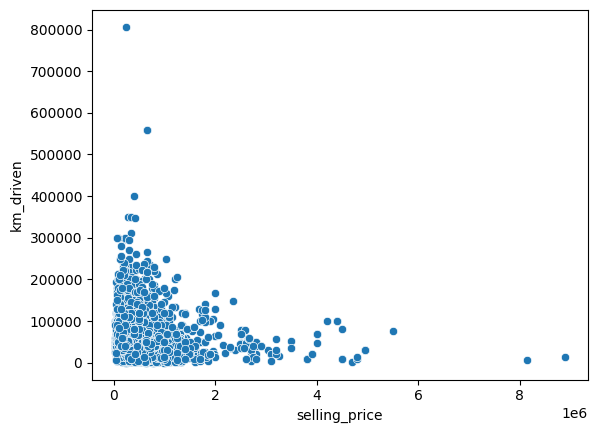

In [17]:
sns.scatterplot(x='selling_price', y='km_driven', data=df)

In [18]:
df['year'][df['selling_price']==df['selling_price'].max()]

3872    2016
Name: year, dtype: int64

In [19]:
df['transmission'][df['selling_price']==df['selling_price'].min()]

2662    Manual
Name: transmission, dtype: object

In [20]:
df['fuel'][df['selling_price']==df['selling_price'].min()]

2662    Petrol
Name: fuel, dtype: object

In [21]:
df['km_driven'][df['selling_price']==df['selling_price'].min()]

2662    25000
Name: km_driven, dtype: int64

In [22]:
df['year'][df['selling_price']==df['selling_price'].max()]

3872    2016
Name: year, dtype: int64

In [23]:
df['selling_price'].corr(df['year'])

0.4139216798108551

<Axes: xlabel='selling_price', ylabel='year'>

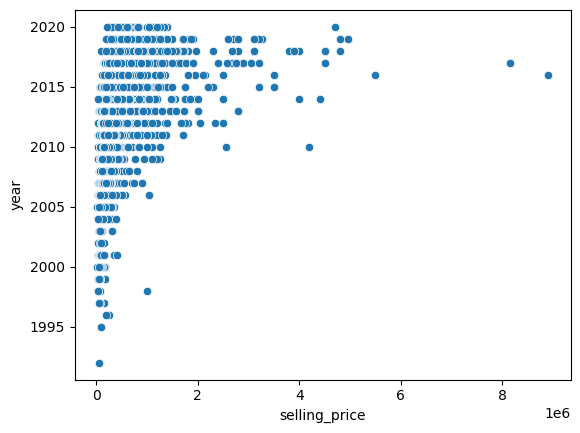

In [24]:
sns.scatterplot(x='selling_price', y='year', data=df)

In [25]:
dd=df['selling_price'].corr(df['km_driven'])
dd

-0.19228863054511436

<Axes: xlabel='selling_price', ylabel='km_driven'>

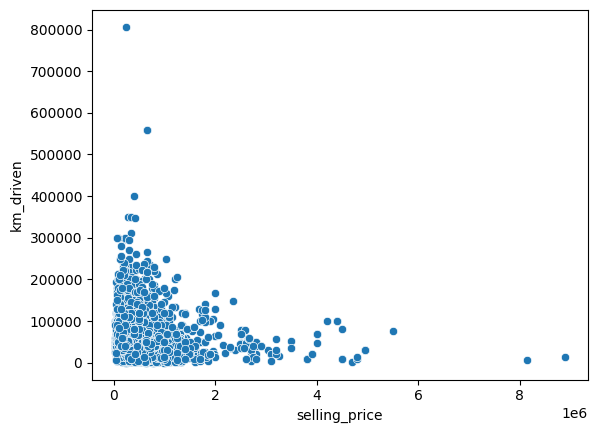

In [26]:
sns.scatterplot(x='selling_price', y='km_driven', data=df)

In [27]:
pd.crosstab(df.owner,df.selling_price)

selling_price,20000,22000,30000,35000,37500,40000,42000,43000,45000,48000,...,4000000,4200000,4400000,4500000,4700000,4800000,4950000,5500000,8150000,8900000
owner,,,,,,,,,,,,,,,,,,,,,
First Owner,0,0,0,0,0,3,0,0,1,0,...,3,1,0,3,1,2,11,1,1,1
Fourth & Above Owner,0,0,0,0,0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Second Owner,1,0,0,0,1,0,0,1,5,0,...,0,0,2,0,0,0,0,0,0,0
Test Drive Car,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Third Owner,0,1,1,3,0,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
